In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
temp_df=pd.read_csv("IMDB Dataset.csv")

In [6]:
temp_df.sample(4)

,review,sentiment
16299,The biggest problem that the TV program Key We...,positive
7019,What can you say about a short little film fil...,positive
17829,One wonders how FLYNN could have failed so bad...,negative
10055,This film has a powerful philosophical ending....,positive


In [7]:
df=temp_df.iloc[:5000,:]

In [8]:
df.sample()

,review,sentiment
4937,This is how i felt while watching this film. I...,positive


In [9]:
df['sentiment'].value_counts()  #blance data for given code 

sentiment
negative    2532
positive    2468
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

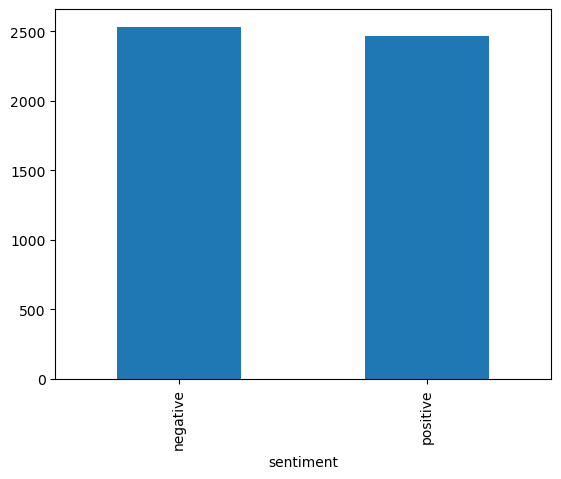

In [10]:
df['sentiment'].value_counts().plot(kind='bar')

In [11]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [12]:
print(df.info())
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
None



review       0
sentiment    0
dtype: int64

In [13]:
df.duplicated().sum()

3

In [14]:
df.drop_duplicates(inplace=True)

C:\Users\jagru\AppData\Local\Temp\ipykernel_6196\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [15]:
df.duplicated().sum()

0

In [16]:
#text preprocessing 
# 1)removing HTML tages 
# 2)removing links 
# 3)Removing puctuations 
# 4)check spellings 
# 5)emoticons working 
# 6)tokenzetion 
# 7)steming or limitization 

In [17]:
#1)removing html tags 
import re 
def remove_tags(raw_text): 
    clear_text=re.sub(re.compile("<.*?>"),'',raw_text)
    return clear_text

In [18]:
df['review']=df['review'].apply(remove_tags)

C:\Users\jagru\AppData\Local\Temp\ipykernel_6196\2928534252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].apply(remove_tags)


In [19]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [20]:
#1)Lower case data 
df['review'] = df['review'].str.lower()

C:\Users\jagru\AppData\Local\Temp\ipykernel_6196\917267839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()


In [21]:
df['review']

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. the filming tec...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
4995    an interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    once again jet li brings his charismatic prese...
4998    i rented this movie, after hearing chris gore ...
4999    this was a big disappointment for me. i think ...
Name: review, Length: 4997, dtype: object

In [22]:
from nltk.corpus import stopwords 
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [23]:
# df['review'].apply(remove_stopwords(df))

In [24]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
4995,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,"i rented this movie, after hearing chris gore ...",negative


In [25]:
X=df.iloc[:,0:1]
y=df['sentiment']

In [26]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
4995    negative
4996    positive
4997    positive
4998    negative
4999    negative
Name: sentiment, Length: 4997, dtype: object

In [27]:
X

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
4995,an interesting slasher film with multiple susp...
4996,i watched this series when it first came out i...
4997,once again jet li brings his charismatic prese...
4998,"i rented this movie, after hearing chris gore ..."


In [28]:
from sklearn.preprocessing import  LabelEncoder 
encoder = LabelEncoder() 
y=encoder.fit_transform(y)

In [29]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [30]:
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [31]:
X.shape

(4997, 1)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()


In [33]:
X_test.shape

(1000, 1)

In [42]:
X_train_bow=cv.fit_transform(X_train['review']).toarray()
X_test_bow=cv.transform(X_test['review']).toarray()
print(X_train_bow)
print(X_test_bow)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB 
gnb=GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

In [36]:
y_pred=gnb.predict(X_test_bow)
from sklearn.metrics import accuracy_score,confusion_matrix 
accuracy_score(y_test,y_pred)

0.618

In [37]:
confusion_matrix(y_test,y_pred)

array([[344, 176],
       [206, 274]], dtype=int64)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier() 
clf2.fit(X_train_bow,y_train)

RandomForestClassifier()

In [39]:
y_pred2=clf2.predict(X_test_bow)
accuracy_score(y_test,y_pred2)

0.833

In [40]:
df['review'][6]

"i sure would like to see a resurrection of a up dated seahunt series with the tech they have today it would bring back the kid excitement in me.i grew up on black and white tv and seahunt with gunsmoke were my hero's every week.you have my vote for a comeback of a new sea hunt.we need a change of pace in tv and this would work for a world of under water adventure.oh by the way thank you for an outlet like this to view many viewpoints about tv and the many movies.so any ole way i believe i've got what i wanna say.would be nice to read some more plus points about sea hunt.if my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,if this is so then i must go so lets do it."

In [41]:
df['sentiment'][6]

'positive'